# Navigation

---

In this notebook, we will train an RL agent how to navigate into a large square environment collecting yellow bananas while avoidijng blue ones. This work makes part of the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).


In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
#%matplotlib inline

from agent import Agent

As we will start the environment please change the `file_name` parameter to match the location of the Unity environment that you downloaded.

In [2]:
path="/home/rihab/Documents/bananaproject/Banana_Linux/Banana.x86_64"

#Load the banana environment
env = UnityEnvironment(file_name=path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
#environment has brains, each responsible of deciding the actions of their associated agents => since it's a single agent game we set the first brain 
#as the default brain we're controlling
#get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the model!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [4]:
#instanciate the agent
agent = Agent(state_size=37, action_size=4, seed=0)

In [5]:
#start training

def dqn(n_episodes=1000, max_t=1000, eps_start=0.5, eps_end=0.01, eps_decay=0.99, train=True):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        eps = eps / i_episode
        env_info = env.reset(train_mode=train)[brain_name]            #reset the environment
        state= env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                           #select an action
            env_info = env.step(action)[brain_name]                  #send action to the enviornment
            next_state = env_info.vector_observations[0]             #get the next state
            reward = env_info.rewards[0]                             #get th reward
            done= env_info.local_done[0]                             #if episode has  finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        #eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'saved_model_weights.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 4.49
Episode 200	Average Score: 8.02
Episode 300	Average Score: 11.58
Episode 346	Average Score: 13.02
Environment solved in 346 episodes!	Average Score: 13.02


### 4. Plot the average score over episodes

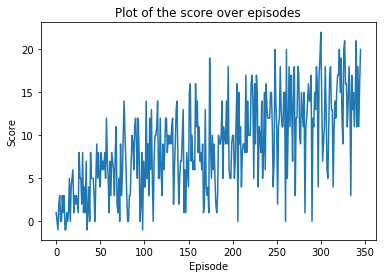

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.title('Plot of the score over episodes')
fig.savefig('socres.png')
plt.show()


### 5. Watch the trained model playing the game
To watch the agent playing the game, we need first to load the trained weights, so we assign the path of the weights in the filename parameter

In [9]:
agent = Agent(state_size=37, action_size=4, seed=0, filename='saved_model_weights.pth')
scores = dqn(n_episodes=100, train=False)


Episode 100	Average Score: 10.91
